<a href="https://colab.research.google.com/github/AdriVilla/EDA/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
data = pd.read_csv('foodhub_order.csv')
df = data.copy()

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The Data Frame has 9 columns corresponding to variables:

order_id   
customer_id
restaurant_name         
cuisine_type            
day_of_the_week        
cost_of_the_order     
rating                 
food_preparation_time   
delivery_time 

Observations in each row correspond to each order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
There are 1898 observations (rows) and 9 variables (columns).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Treating "not given" values as naan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

In [ ]:
# Converting values to float
df['rating'] = df['rating'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
* Initially there were 5 numerical variables and 4 object variables.
* We got now 6 numerical variables and 3 object variables.
* "Rating" was considered as an object (string) and seemed to have no missing values, but now with the correct data type, we can see that it has 736 missing values. 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


* Rating shows 736 missing values. 

In [ ]:
# Analysing rating mean/mode/median
print(df['rating'].mean())
print(df['rating'].mode())
print(df['rating'].median())

4.344234079173838
0    5.0
dtype: float64
5.0


In [ ]:
# Anaylising the % of missing values from the variable 
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})   

,Count,Percentage
rating,736,38.777661


* Missing values represent 39% of the observations. It would no be right to eliminate them. 

In [ ]:
df.loc[df['rating'].isnull()==True,'cuisine_type'].value_counts(dropna=False)

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})   

,Count,Percentage


In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df['rating'] = df['rating'].astype(int)

In [ ]:
print(df['rating'].mean())
print(df['rating'].mode())
print(df['rating'].median())

4.598524762908324
0    5
dtype: int64
5.0


* Central tendency measures did not change for the median and mode, however, the mean has a slight change from 4.34 to 4.59.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.0,NaN,NaN,NaN,4.598525,0.662289,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
* Restaurant: There are 178 restaurants where people have ordered from. The most popular to order is Shake Shack with 11.5% of the frequency.
* Cuisine type: There are 14 different cuisine types, and "American" food is the most popular with 30% of the orders being from this type of restaurant. 
* Cost of the order: The average price of an order is 16.50 USD, while 75% of them cost $22.30 USD or above. 
* Day of the week: The weekends is the most popular time of the week to place an order through the app since it has 71% of the orders placed.
* Rating: Minimum rating is 3 and the maximum rating point is 5. The average rating grade is 4.59 and 25% of the orders have rating bellow 4.  
* Food preparation time: On average food takes around 27 min to be prepared before delivery. The average and the mean are almost the same.  75% of the orders are prepared 31 minutes or less. 
* Delivery time: The average delivery time is 24 minutes and the longest waiting time was in 33 minutes. The average and the median are almost the same. 

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#Adding missing values from each variable
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There were 736 missing values in this data set corresponding to "rating" but were treated in question 3.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Exploration of the categorical variables

In [ ]:
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# The percentage of orders that each restaurant represents from the total amount of orders.
df['restaurant_name'].value_counts(normalize=True) * 100

Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
                               ...    
Sushi Choshi                  0.052687
Dos Caminos Soho              0.052687
La Follia                     0.052687
Philippe Chow                 0.052687
'wichcraft                    0.052687
Name: restaurant_name, Length: 178, dtype: float64

* There are 178 different restaurants in this data set.
* The most popular restaurants to order from: Shake Shack with 219 orders, The Meatball Shop with 132, Blue Ribbon Sushi with 119, Blue Ribbon Fried Chicken with 96, and Parm with 68 orders.
* This restaurants represent 11%, 6.9%,6.2%, 5% and 3.6% of the total number of orders. 

In [ ]:
# Graphing top 10 restaurants from where people order the most
top_10 = df.groupby('restaurant_name').count().sort_values(by='order_id',ascending=False).head(10)
top_10

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68
RedFarm Broadway,59,59,59,59,59,59,59,59
RedFarm Hudson,55,55,55,55,55,55,55,55
TAO,49,49,49,49,49,49,49,49
Han Dynasty,46,46,46,46,46,46,46,46


In [ ]:
top_10.reset_index(inplace=True)

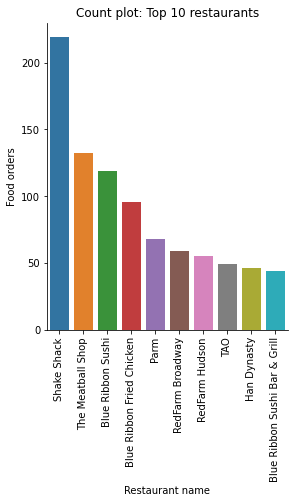

<Figure size 2160x720 with 0 Axes>

In [ ]:
sns.catplot(data=top_10, x= "restaurant_name", y = 'order_id', kind = 'bar')
plt.title('Count plot: Top 10 restaurants')
plt.ylabel('Food orders') 
plt.xlabel('Restaurant name') 
plt.xticks(rotation=90)
plt.figure(figsize=(30,10));


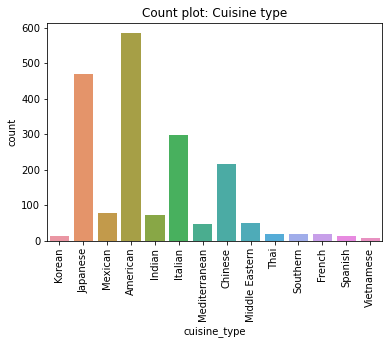

In [ ]:
# Cuisine type
sns.countplot(data= df, x = "cuisine_type")
plt.title('Count plot: Cuisine type')
plt.xticks(rotation=90)
plt.show();

In [ ]:
df["cuisine_type"].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

* There are 14 different cuisine types. American, Japanese, Italian and Chinese are the most popular.
* A total of 584 orders were placed for American food, 470 for Japanese cuisine, 298 for Italian, and 215 for Chinese cuisine. 

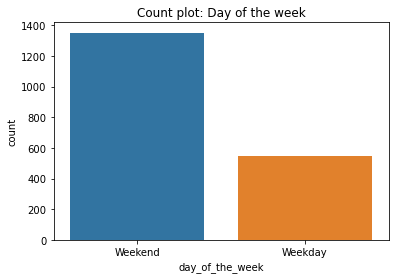

In [ ]:
# Day of the week
sns.countplot(data= df, x = "day_of_the_week")
plt.title('Count plot: Day of the week')
plt.show();

In [ ]:
print(df["day_of_the_week"].value_counts())
print(df["day_of_the_week"].value_counts(normalize = True))

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64


* Weekends are the most popular days for people to order. People place 71% of the orders on weekends and just 28% en weekdays. 

#### Exploration of numerical data

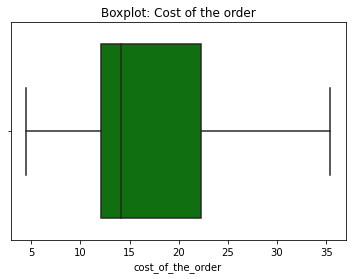

In [ ]:
# Cost of the order
plt.title('Boxplot: Cost of the order')
sns.boxplot(data = df, x = 'cost_of_the_order', color = 'green');

* The median cost of an order is around 14.50 USD.

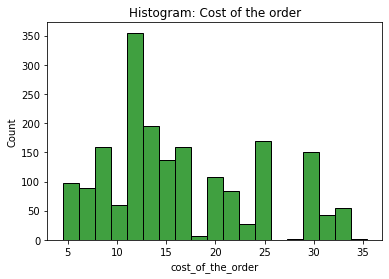

In [ ]:
plt.title('Histogram: Cost of the order')
sns.histplot(data = df, x = 'cost_of_the_order', color = 'green');

* Most of the orders cost about 11-12 USD. 

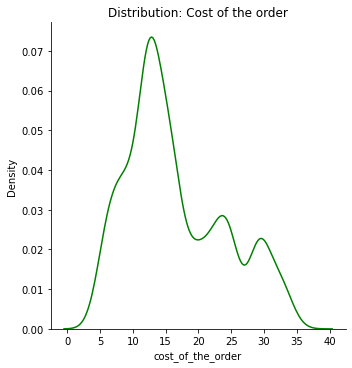

In [ ]:
sns.displot(data=df,x= 'cost_of_the_order',kind='kde', color = 'green')
plt.title('Distribution: Cost of the order');

* We can observe that cost of the order is multimodal:
    1. 12 USD
    2. 24 USD
    3. 30 USD

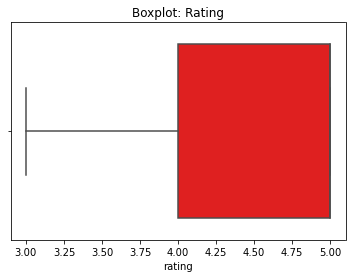

In [ ]:
# Analysing rating
plt.title('Boxplot: Rating')
sns.boxplot(data = df, x = 'rating', color = 'red');

The rating has a median of 5 and a maximal rating of 5. 

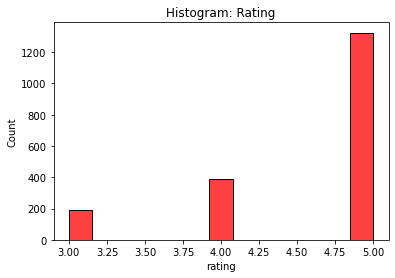

In [ ]:
plt.title('Histogram: Rating')
sns.histplot(data = df, x = 'rating', color = 'red');

In [ ]:
df['rating'].unique()

array([5, 3, 4])

* There are only 3 types of rating scores: 3, 4 ,and 5.

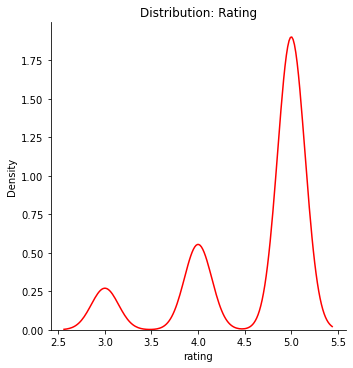

In [ ]:
sns.displot(data=df,x= 'rating',kind='kde', color = 'red')
plt.title('Distribution: Rating');

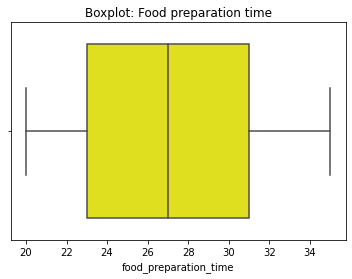

In [ ]:
# Analysing Food preparation time 
plt.title('Boxplot: Food preparation time')
sns.boxplot(data = df, x = 'food_preparation_time', color = 'yellow');

Food preparation time varies from 20 minutes to 35 minutes. The median preparation time is 27 minutes. 

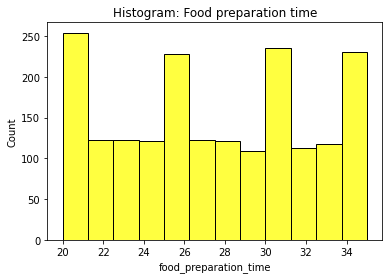

In [ ]:
plt.title('Histogram: Food preparation time')
sns.histplot(data = df, x = 'food_preparation_time', color = 'yellow');

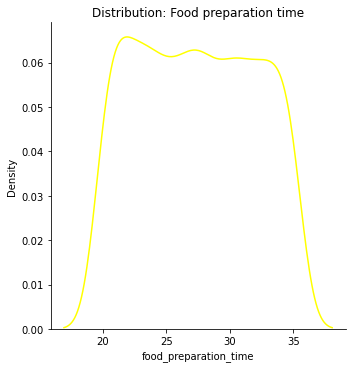

In [ ]:
sns.displot(data=df,x= 'food_preparation_time',kind='kde', color = 'yellow')
plt.title('Distribution: Food preparation time');

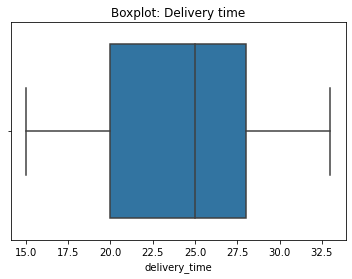

In [ ]:
# Analysing Delivery time
plt.title('Boxplot: Delivery time')
sns.boxplot(data = df, x = 'delivery_time');

Delivery time ranges from 15- 33 minutes. The median delivery time is 25 minutes. 

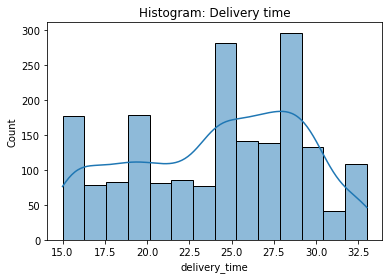

In [ ]:
plt.title('Histogram: Delivery time')
sns.histplot(data = df, x = 'delivery_time', kde = True);

* Delivery time is skewed to the left. 

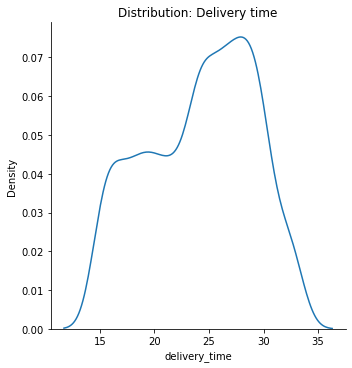

In [ ]:
sns.displot(data=df,x= 'delivery_time',kind='kde')
plt.title('Distribution: Delivery time');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants with the most orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

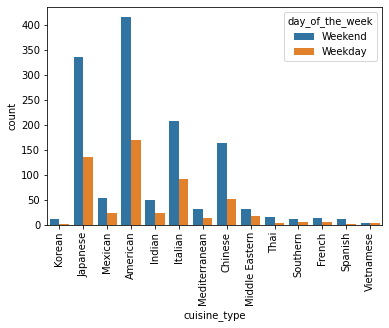

In [ ]:
# Graphing cuisine type and day of the week.
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

In [ ]:
df.groupby(by = ['cuisine_type'])['day_of_the_week'].value_counts()

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

#### Observations:
The most popular cuisine type on weekends is American food with a total of 415 orders. American food is also the most popular on weekdays with 169 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
more_20 = df['cost_of_the_order'] > 20

In [ ]:
# Percentages of orders that cost more than $20 USD
more_20.value_counts(normalize = True)*100

False    70.758693
True     29.241307
Name: cost_of_the_order, dtype: float64

In [ ]:
more_20.value_counts()

False    1343
True      555
Name: cost_of_the_order, dtype: int64

#### Observations:
* Almost 30% of the orders cost more than $20 USD.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Method 1: by counting customer_id unique values 
df['customer_id'].value_counts() 

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
# Method 2 by using function groupby
orders_cost = df.groupby(['customer_id'])[['order_id']].count()

orders_cost.sort_values(by = 'order_id', ascending=False)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
...,...
105903,1
105992,1
106006,1


#### Observations:
Top 3 customers are: 52832 with 13 orders , 47440 with 10 orders and 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# We see the correlation between variables 
df.corr()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.022405,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.001239,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.002335,0.041527,-0.029949
rating,-0.022405,0.001239,0.002335,1.000000,-0.005422,-0.005722
food_preparation_time,-0.007026,-0.030330,0.041527,-0.005422,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.005722,0.011094,1.000000


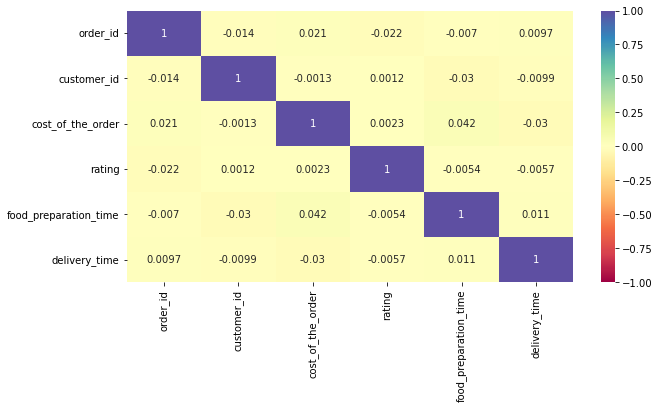

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* There are no significant correlations between variables


In [ ]:
# We create a variable that might help in the analysis. 
# Clients perceive the total amount of time it took: delivery preparation time + delivery time
df['total_delivery_time'] = df['food_preparation_time']+ df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,5,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


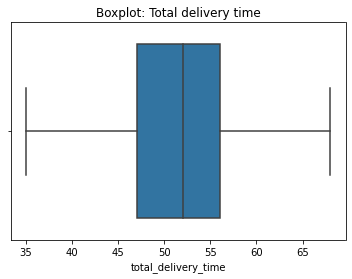

In [ ]:
# Total Delivery time analysis
plt.title('Boxplot: Total delivery time')
sns.boxplot(data = df, x = 'total_delivery_time');

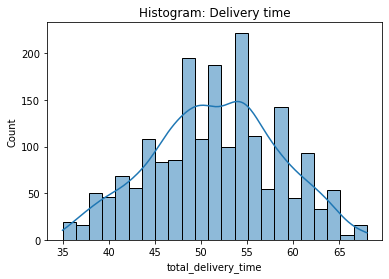

In [ ]:
plt.title('Histogram: Delivery time')
sns.histplot(data = df, x = 'total_delivery_time', kde=True);

* The minimum total delivery time is 35 min and the maximum delivery time is 67 minutes.

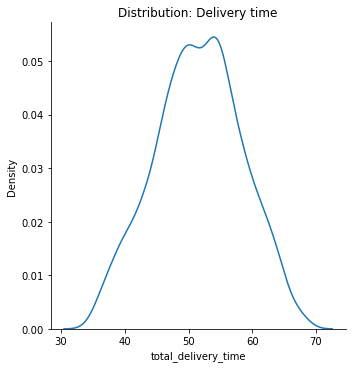

In [ ]:
sns.displot(data=df,x= 'total_delivery_time',kind='kde')
plt.title('Distribution: Delivery time');

* Total delivery time seems to have a normal distribution. 

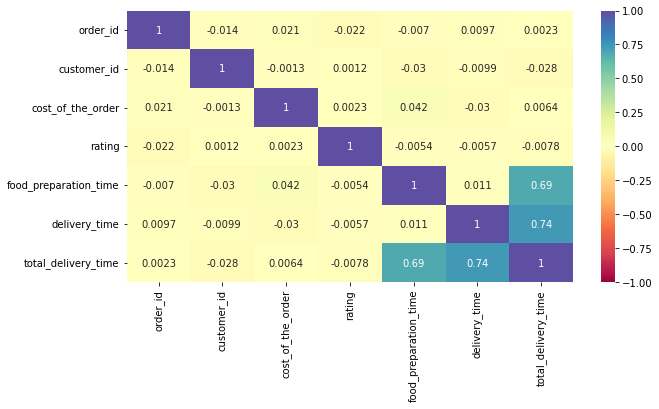

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Creating a variable that captures the total delivery time.
* In the end, customers measure the total time until their meals are delivered. 
* There is a correlation between the created variable with the variables with which it was created. 
* There is a positive correlation of 0.74 for total delivery time and delivery time.
* There is a positive correlation of 0.69 for total delivery time and food preparation time. 

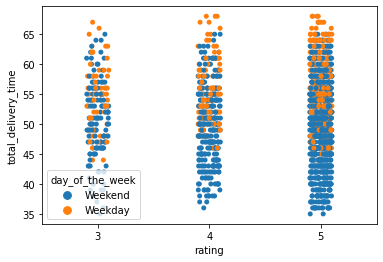

In [ ]:
# Rating and Total_delivery_time
sns.stripplot(data=df,y='total_delivery_time',x='rating', hue= 'day_of_the_week', jitter= True);


* The majority of ratings are concentrated between rating grades 4 and 5 independent of the day of the week. 
* For rating 5 even though orders take more than 60 minutes for a total delivery time, there is still a denser concentration of orders rated 5 as compared to ratings 4 and 3.  
* Seems that weekends take leaser than weekdays for food to be delivered. There are no orders on weekdays that are delivered in less than 23 minutes.

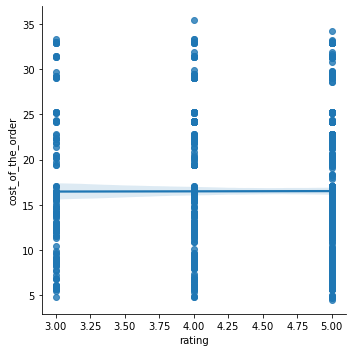

In [ ]:
sns.lmplot(data = df, x='rating', y= 'cost_of_the_order');

* There is no correlation between cost of the order and rating. 

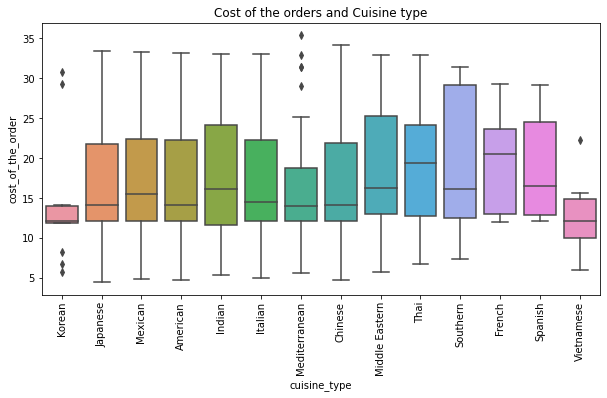

In [ ]:
# Price and restaurant type
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order') # turning off outliers
plt.title("Cost of the orders and Cuisine type") 
plt.xticks(rotation=90)
plt.show()

* Chinese cuisine has the highest price per order at 34 USD, however, french cuisine has the highest median price per order at 21 USD.
* Korean's median and minimum prices are almost the same. 
* Mediterranean cuisine has 4 outliers, Korean 5 outliers, and Vietnamese cuisine 1 outlier.
* American, Japanese, and Chinese median prices are 14 USD while Italian cuisine median price is 15 USD. 


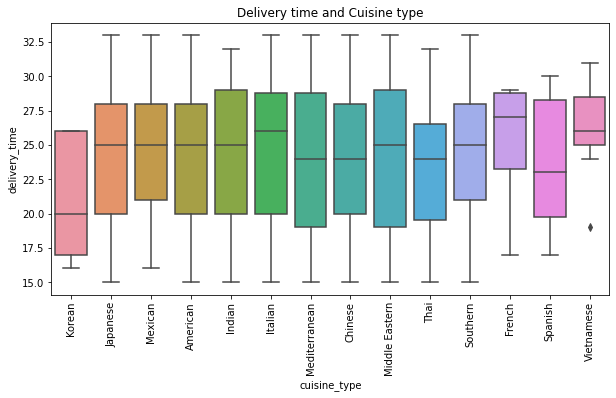

In [ ]:
# Price and restaurant type
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time') # turning off outliers
plt.title("Delivery time and Cuisine type") 
plt.xticks(rotation=90)
plt.show()

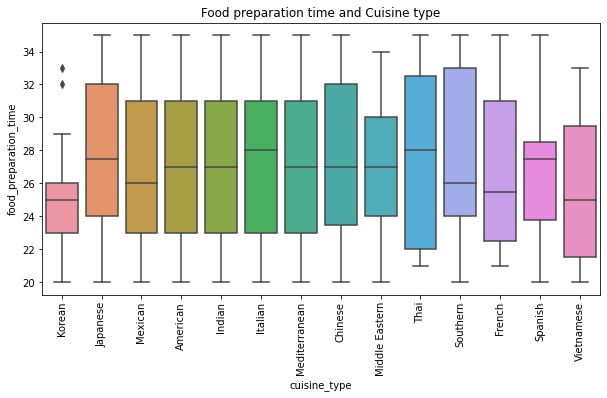

In [ ]:
# Food preparation time and cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time') # turning off outliers
plt.title("Food preparation time and Cuisine type") 
plt.xticks(rotation=90)
plt.show()

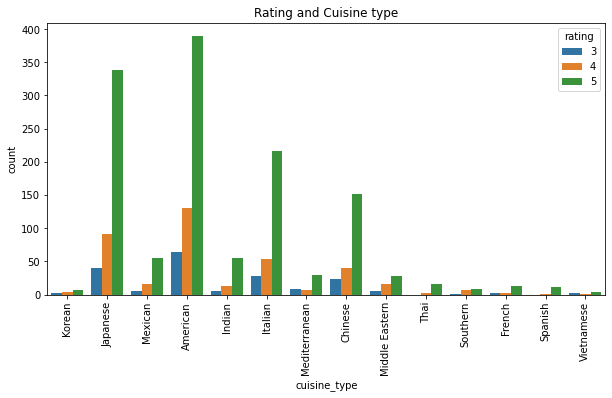

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x= 'cuisine_type',hue ='rating')
plt.title("Rating and Cuisine type") 
plt.xticks(rotation=90);

* The most popular cuisine types to order from (American, Japanese, Chinese and Italian) tend to be graded the most with 5 and have fewer orders graded with 3. 
* Only Korean, Middle Eastern, and Southern cuisines are rated the most with a grade of 4. 

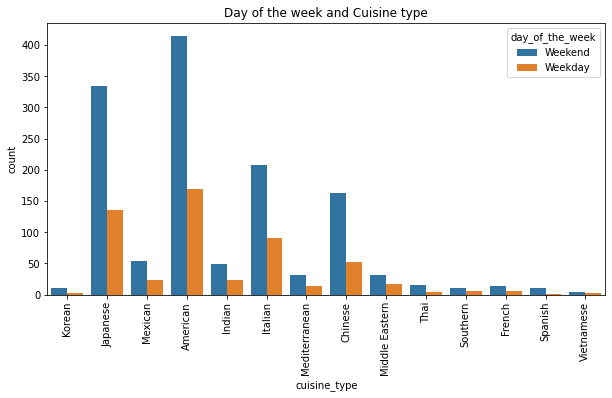

In [ ]:
# Restaurant type and day of the week

plt.figure(figsize=(10,5))
sns.countplot(data =df,x= 'cuisine_type', hue = 'day_of_the_week')
plt.title("Day of the week and Cuisine type") 
plt.xticks(rotation=90)
plt.show();

* American food is the most popular to be ordered during weekdays and weekdays followed by Japanese, then Italian and Chinese independent of the day of the week.


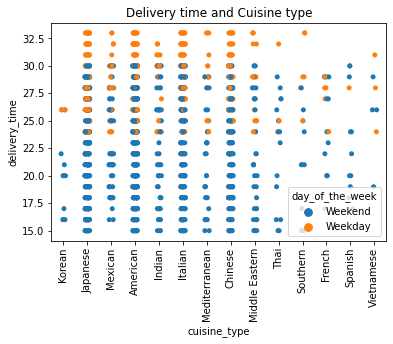

In [ ]:
sns.stripplot(data=df, x='cuisine_type', y='delivery_time', hue="day_of_the_week",jitter=True )
plt.title("Delivery time and Cuisine type") 
plt.xticks(rotation=90);  

There is a clear pattern that shows that delivery time is higher in weekdays than on weekends independent of the type of cuisine.

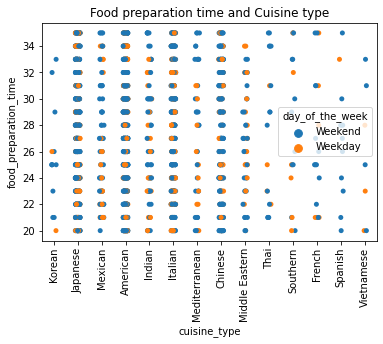

In [ ]:
sns.stripplot(data=df, x='cuisine_type', y='food_preparation_time', hue="day_of_the_week",jitter=True)
plt.title("Food preparation time and Cuisine type") 
plt.xticks(rotation=90);

There is no pattern in food preparation time during weekends or weekdays nor in the type of cuisine. 

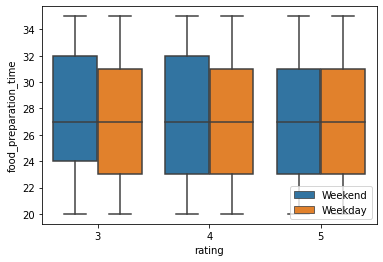

In [ ]:
sns.boxplot(data = df, y='food_preparation_time', x='rating', hue= 'day_of_the_week')
plt.legend(loc= 'lower right');

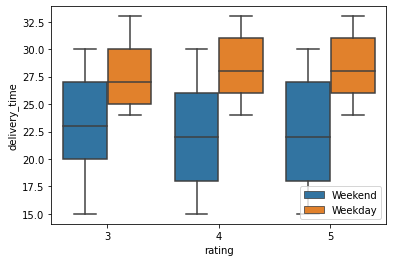

In [ ]:
sns.boxplot(data = df, y='delivery_time', x='rating', hue= 'day_of_the_week')
plt.legend(loc= 'lower right');

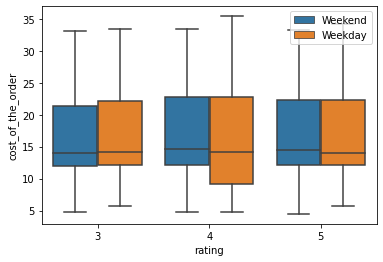

In [ ]:
sns.boxplot(data = df, y='cost_of_the_order', x='rating', hue= 'day_of_the_week')
plt.legend(loc= 'upper right');

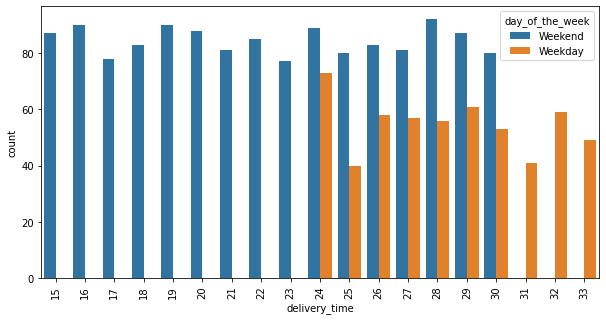

In [ ]:
# Delivery time and day of the week
plt.figure(figsize=(10,5))
sns.countplot(data =df,x= 'delivery_time', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

* We can see that on weekdays the minimum delivery time is 24 minutes and the maximum 33, as for weekends the minimum delivery time is 15 minutes and the maximum 30.

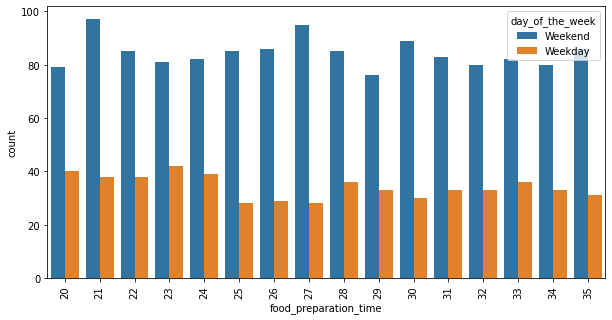

In [ ]:
# Delivery time and day of the week
plt.figure(figsize=(10,5))
sns.countplot(data =df,x= 'food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

Observation: Food preparation time during weekdays and weekends goes from 15 to 40 minutes. The time-lapse is the same between weekdays and weekends.

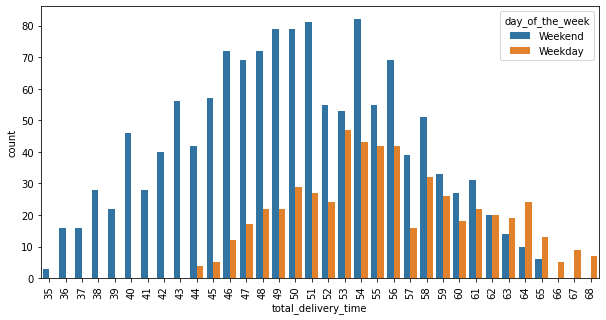

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data =df,x= 'total_delivery_time', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

* Weekends and weekdays total delivery time distribution have a normal distribution, which is caused by the food delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Getting a DF where there are just orders rated above 3.
rating_4 = df[df['rating'] > 3]

In [ ]:
rating_4.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_delivery_time
count,1.710000e+03,1710.000000,1710.00000,1710.000000,1710.000000,1710.000000,1710.000000
mean,1.477495e+06,170449.077778,16.52914,4.774269,27.365497,24.118129,51.483626
std,5.450132e+02,113207.778888,7.44528,0.418185,4.618669,5.005914,6.876195
min,1.476547e+06,1311.000000,4.47000,4.000000,20.000000,15.000000,35.000000
25%,1.477027e+06,77544.000000,12.08000,5.000000,23.000000,20.000000,47.000000
50%,1.477496e+06,128476.500000,14.23500,5.000000,27.000000,25.000000,51.000000
75%,1.477964e+06,270370.250000,22.31000,5.000000,31.000000,28.000000,56.000000
max,1.478443e+06,405334.000000,35.41000,5.000000,35.000000,33.000000,68.000000


In [ ]:
# Considering only restaurants with a value count above 50. 
rating_4['restaurant_name'].value_counts()

Shake Shack                  196
The Meatball Shop            122
Blue Ribbon Sushi            103
Blue Ribbon Fried Chicken     85
Parm                          59
                            ... 
The MasalaWala                 1
Crema Restaurante              1
Gaia Italian Cafe              1
Cafe de La Esquina             1
'wichcraft                     1
Name: restaurant_name, Length: 172, dtype: int64

#### Observations:
This are the restaurants with a rating >= 4 and with a rating counts >=50
* Shake Shack - This restaurant has 196 rating counts and a rating =>4             
* The Meatball Shop - This restaurant has 122 rating counts and a rating =>4         
* Blue Ribbon Sushi -This restaurant has 103 rating counts and a rating =>4             
* Blue Ribbon Fried Chicken - This restaurant has 85 rating counts and a rating =>4  

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Method 1: Getting the number through filters.
cost_more20 = df[df['cost_of_the_order'] > 20] 

In [ ]:
cost_less20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20) ]

In [ ]:
revenue_25 = cost_more20['cost_of_the_order']* 0.25

In [ ]:
revenue_15 = cost_less20['cost_of_the_order']* 0.15

In [ ]:
total_revenue =revenue_25.sum() +  revenue_15.sum()
print('The total revenue for the company is:','$',total_revenue)

The total revenue for the company is: $ 6166.303


In [ ]:
# Method 2: Creating a new column and summing the values
revenue = []
for i in df['cost_of_the_order']:
    if (i > 20):
        temp = i * 0.25
        revenue.append(temp)
    elif (i > 5) and (i <=20):
        temp = i * 0.15
        revenue.append(temp)
    else:
        temp = i * 0
        revenue.append(temp)

In [ ]:
df['revenue']= revenue

In [ ]:
df['revenue'].sum()

6166.303

#### Observations:
The net revenue for the company is: $ 6172.714 USD

In [ ]:
# Checking the median price per ticket for each restaurant.
# ¿Is the ticket value important?
rev_mean = df.groupby(['restaurant_name'])[['revenue']].mean().sort_values(by = 'revenue', ascending=False)

In [ ]:
rev_mean.reset_index(inplace=True)

In [ ]:
rev_mean

,restaurant_name,revenue
0,Kambi Ramen House,8.23250
1,Emporio,7.85750
2,Bhatti Indian Grill,7.77875
3,Haru Gramercy Park,7.45750
4,Il Bambino,7.31250
...,...,...
173,Market Table,1.01850
174,Wa Jeal,1.01100
175,Cipriani Le Specialita,0.88800
176,Big Wong Restaurant _¤¾Ñ¼,0.88800


In [ ]:
# Comparing in what placed the top 5 most popular restaurants to order fell into.
print(rev_mean.loc[rev_mean['restaurant_name'] == 'Shake Shack'])
print(rev_mean.loc[rev_mean['restaurant_name'] == 'The Meatball Shop'])
print(rev_mean.loc[rev_mean['restaurant_name'] == 'Blue Ribbon Sushi'])
print(rev_mean.loc[rev_mean['restaurant_name'] == 'Blue Ribbon Fried Chicken'])
print(rev_mean.loc[rev_mean['restaurant_name'] == 'Parm'])

   restaurant_name   revenue
75     Shake Shack  3.212817
      restaurant_name   revenue
81  The Meatball Shop  3.180519
      restaurant_name  revenue
88  Blue Ribbon Sushi  3.02908
              restaurant_name   revenue
58  Blue Ribbon Fried Chicken  3.543786
   restaurant_name   revenue
74            Parm  3.214074


* Shake Shack, Meatball Shop, Blue Ribben Sushi, Blue Ribbon Fried Chicken, and Parm are the most popular restaurants, however, they are not the ones that generate the highest revenues per ticket (median bill price per order). Of 178 restaurants, they don't belong to the top 10 restaurants with the highest median tickets, on the contrary, they are listed in 75th place, 81st place, 88th place, 58th place, and 74th place.
* Top 5 restaurants with the highest median ticket per order are Kambi Ramen House, Emporio, Bhatti Indian Grill, Haru Gramercy Park, and Bambino. 


In [ ]:
# Analysing if median ticket value is actually important. 
# ¿Restaurants with the highest median ticket value per order generate significant revenues?
rev = df.groupby(['restaurant_name'])[['revenue']].sum().sort_values(by = 'revenue', ascending=False)
rev.reset_index(inplace=True)

In [ ]:
rev

,restaurant_name,revenue
0,Shake Shack,703.6070
1,The Meatball Shop,419.8285
2,Blue Ribbon Sushi,360.4605
3,Blue Ribbon Fried Chicken,340.2035
4,Parm,218.5570
...,...,...
173,Market Table,1.0185
174,Wa Jeal,1.0110
175,Cipriani Le Specialita,0.8880
176,Big Wong Restaurant _¤¾Ñ¼,0.8880


In [ ]:
# Analysing what placed did top 5 highest median tickets restaurants have when talking about generated revenue
print(rev.loc[rev['restaurant_name'] == 'Kambi Ramen House'])
print(rev.loc[rev['restaurant_name'] == 'Emporio'])
print(rev.loc[rev['restaurant_name'] == 'Bhatti Indian Grill'])
print(rev.loc[rev['restaurant_name'] == 'Haru Gramercy Park'])
print(rev.loc[rev['restaurant_name'] == 'Il Bambino'])

       restaurant_name  revenue
104  Kambi Ramen House   8.2325
    restaurant_name  revenue
108         Emporio   7.8575
        restaurant_name  revenue
68  Bhatti Indian Grill  15.5575
        restaurant_name  revenue
109  Haru Gramercy Park   7.4575
    restaurant_name  revenue
110      Il Bambino   7.3125


Top 5 most popular restaurants to order from might not have the highest tickets, however they are the top 5 restaurants that generate revenue in comparison to those restaurants with the highest median tickets. 

In [ ]:
# Creating a new variable with the % of revenue generated by each observation.
per_rev = df['revenue']/6166.303*100

In [ ]:
df['percentage'] = per_rev

In [ ]:
perce_sum = df.groupby(['restaurant_name'])[['percentage','day_of_the_week']].sum() 
perce_sum.sort_values(by = 'percentage',ascending=False)

,percentage
restaurant_name,
Shake Shack,11.410516
The Meatball Shop,6.808431
Blue Ribbon Sushi,5.845650
Blue Ribbon Fried Chicken,5.517139
Parm,3.544377
...,...
Market Table,0.016517
Wa Jeal,0.016396
Cipriani Le Specialita,0.014401


The top 5 most popular restaurants generate the most significant income. The order of popularity corresponds to the order of generated revenue. 

In [ ]:
# Analysing the day of the week and revenue percentage for each restaurant.
perce_sum_day = df.groupby(['restaurant_name','day_of_the_week'])[['percentage',]].sum() 
perce_sum_day.sort_values(by = 'percentage',ascending=False)

,,percentage
restaurant_name,day_of_the_week,
Shake Shack,Weekend,7.388811
The Meatball Shop,Weekend,4.997768
Blue Ribbon Fried Chicken,Weekend,4.417177
Shake Shack,Weekday,4.021705
Blue Ribbon Sushi,Weekend,4.013264
...,...,...
Zero Otto Nove,Weekend,0.014279
Haveli Indian Restaurant,Weekend,0.013914
Hunan Manor,Weekday,0.013914


The top 5 restaurants generate the highest revenues from the total revenue. This company's revenues depend on the volume of orders and not on high tickets. 
The highest revenues are made during weekends.

In [ ]:
# Analysing the day of the week and revenue percentage sum for all the DF.
df.groupby(['day_of_the_week'])[['percentage',]].sum()

,percentage
day_of_the_week,
Weekday,28.450345
Weekend,71.549655


In [ ]:
# Analysing the day of the week and revenue sum for all the DF.
df.groupby(['day_of_the_week'])[['revenue']].sum()

,revenue
day_of_the_week,
Weekday,1754.3345
Weekend,4411.9685


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Filtering orders that take more than 60 min to be delivered
# Total delivery time was created above.
total_time_more60 = df['total_delivery_time'] > 60

In [ ]:
# Counting TRUE values 
total_time_more60.value_counts(normalize = True)* 100

False    89.462592
True     10.537408
Name: total_delivery_time, dtype: float64

In [ ]:
total_time_more60.value_counts()

False    1698
True      200
Name: total_delivery_time, dtype: int64

#### Observations:
* 10.5% of the orders take more than 60 minutes to deliver the food once the order is placed. 
* This represents a total amount of 200 orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Analyzing the 3 variables related to time.
df.groupby(['day_of_the_week'])[['total_delivery_time']].mean() 

,total_delivery_time
day_of_the_week,
Weekday,55.552102
Weekend,49.906736


In [ ]:
df.groupby(['day_of_the_week'])[['food_preparation_time']].mean() 

,food_preparation_time
day_of_the_week,
Weekday,27.212066
Weekend,27.436714


In [ ]:
df.groupby(['day_of_the_week'])[['delivery_time']].mean() 

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* Delivery times take slightly more time to deliver (since the order is placed) on Weekdays. 
* The difference in mean delivery time weekends vs weekdays is just 5.6 minutes. 
* This difference is directly dependent on "delivery time". 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* There is no correlation between variables on the data set. When “Total delivery order” is created between delivery time and preparation time, this variable inevitably showed a high correlation with one another. 

* There are 14 different cuisine types, and the most popular is American cuisine with 584 orders, followed by Japanese with 470, Italian with 298, and Chinese with 215.

* Vietnamese and Spanish food are the least popular cuisine types with 12 and 7 orders placed.

* In total, 71% of the orders are placed on weekends and only 29% are placed on weekdays. 

* The median cost of the order is USD 14, but prices are most frequently between USD 11-12.

* People rate high with 5, independent of the total time that it takes for the food to be delivered and independent of the day of the week. 

* There is no correlation between the rating given to the food and the cost of the order, which means that ratings don’t depend on the price paid for the food.

* Food preparation time takes the same independent of the day of the week, and its median preparation time is 27 minutes. Preparation time ranges from 20-35 minutes. 

* Delivery food time has a range of time of 15-33 minutes and a median of 24.16 minutes. 

* There is a clear difference between the delivery time on weekdays and weekends. The delivery time during weekdays won’t take less than 24 minutes and will take a maximum of 33 minutes, while weekends delivery times are made in a minimum of 15 minutes and a maximum of 30 minutes. There is a difference of 9 more minutes between the minimum delivery times between weekdays and weekends. 

* 71 % of the orders are placed on weekends, and even though fewer orders are being placed on weekdays, it takes longer on weekdays for the food to be delivered. Retards are not caused by a saturation of the orders being placed, but rather from an external factor such as weekdays traffic from everyday commuting (work,schools, etc), however, internal factors such as not having enough delivery workers may also be affecting.  

* The top 5 most popular restaurants to order from are Shake Shack, Meatball Shop, Blue Ribben Sushi, Blue Ribbon Fried Chicken, and Parm. This restaurants are also the top 5 revenue generators for the App: 11.42%, 6.80%, 5.83%, 5.51% and 3.54% of total revenue.

* Revenues' principal component is the variety of restaurants to choose from. The App revenues come mainly from the volume of orders placed, and not from the high tickets.





### Recommendations:
There are two areas of opportunity:
1. Improve delivery times on weekdays.
2. Increase sales on weekdays

Improve delivery times on weekdays:

Delivery time on weekdays is longer because of everyday commuting traffic (workers/schools/etc.), therefore changing the logistics strategy by increasing bicycle deliveries; and other transportation methods such as scooters and motorcycles would be an option to reduce time delivery. 

A good customer experience is necessary for customer loyalty.  

To increase sales on weekdays:
1. Give coupons for free deliveries to the top 5 most popular restaurants and top 5 revenue generator restaurants.
2. Give packages/combos in alliance with the top 5 revenue generators to a) increase the frequency of orders  and b) increase tickets' total price per order. 


---